In [19]:
# Importing the required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Dataset loading
file_path = "C:/Users/Om Chinchore/Desktop/VU SEM-VI/flipkart.csv"
dataset = pd.read_csv(file_path)

# Text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for word, tag in pos_tags:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        else:
            pos = 'a'  # Adjective or adverb
        lemmatized_tokens.append(lemmatizer.lemmatize(word, pos))
    
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    no_punctuation_tokens = [token.translate(table) for token in lemmatized_tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in no_punctuation_tokens if word.lower() not in stop_words]
    
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Sentiment analysis implementation
def perform_sentiment_analysis(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        sentiment_label = "Positive"
    elif polarity == 0:
        sentiment_label = "Neutral"
    else:
        sentiment_label = "Negative"
    return sentiment_label, polarity

# Integration of text preprocessing and sentiment analysis results into the dataset
dataset['Preprocessed_Review'] = dataset['Review'].apply(preprocess_text)
dataset['Sentiment_Label'], dataset['Sentiment_Polarity'] = zip(*dataset['Preprocessed_Review'].apply(perform_sentiment_analysis))

# Regression analysis
X = dataset['Sentiment_Polarity'].values.reshape(-1, 1)
y = dataset['Rating'].values.reshape(-1, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Making predictions
y_pred = regression_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



[nltk_data] Downloading package punkt to C:\Users\Om
[nltk_data]     Chinchore\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Om
[nltk_data]     Chinchore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Om
[nltk_data]     Chinchore\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Om Chinchore\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Mean Squared Error: 1.0146121650545485


In [2]:
# Displaying the updated dataset with sentiment analysis results
print(dataset.head(50))

    Unnamed: 0                                       Product_name  \
0            0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1            1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2            2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3            3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4            4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
5            5  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
6            6  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
7            7  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
8            8  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
9            9  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
10          10  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
11          11  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
12          12  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
13          13  ASUS VivoBook 15 (

In [3]:
#Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the hyperparameter grid
param_grid = {
    'fit_intercept': [True, False],  # Whether to fit the intercept
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Best Model):", mse)


Best Hyperparameters: {'fit_intercept': True}
Mean Squared Error (Best Model): 1.0146121650545485


In [4]:
# Training multiple versions to check for best configuration
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of hyperparameters to explore
hyperparameters = [
    {'fit_intercept': True},
    {'fit_intercept': False}
]

# Train models with different hyperparameters
models = []
for params in hyperparameters:
    model = make_pipeline(StandardScaler(), LinearRegression(**params))
    model.fit(X_train, y_train)
    models.append(model)

# Evaluate model performance
mse_values = []
for model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Compare performance
best_model_index = mse_values.index(min(mse_values))
best_model = models[best_model_index]
best_params = hyperparameters[best_model_index]
best_mse = mse_values[best_model_index]

# Print results
print("Model Performances:")
for i, params in enumerate(hyperparameters):
    print(f"Model {i+1} Hyperparameters:", params)
    print(f"Model {i+1} MSE:", mse_values[i])
    print()

print("Best Model Hyperparameters:", best_params)
print("Best Model MSE:", best_mse)


Model Performances:
Model 1 Hyperparameters: {'fit_intercept': True}
Model 1 MSE: 1.0146121650545488

Model 2 Hyperparameters: {'fit_intercept': False}
Model 2 MSE: 19.473952000360853

Best Model Hyperparameters: {'fit_intercept': True}
Best Model MSE: 1.0146121650545488


In [5]:
# Adding n-Grams
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset['Review'], dataset['Rating'], test_size=0.2, random_state=42)

# Define a pipeline for text feature extraction and modeling
text_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),  # Include both unigrams and bigrams
    ('regressor', LinearRegression())
])

# Train the model
text_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = text_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Mean Squared Error: 0.7209933361590581


C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


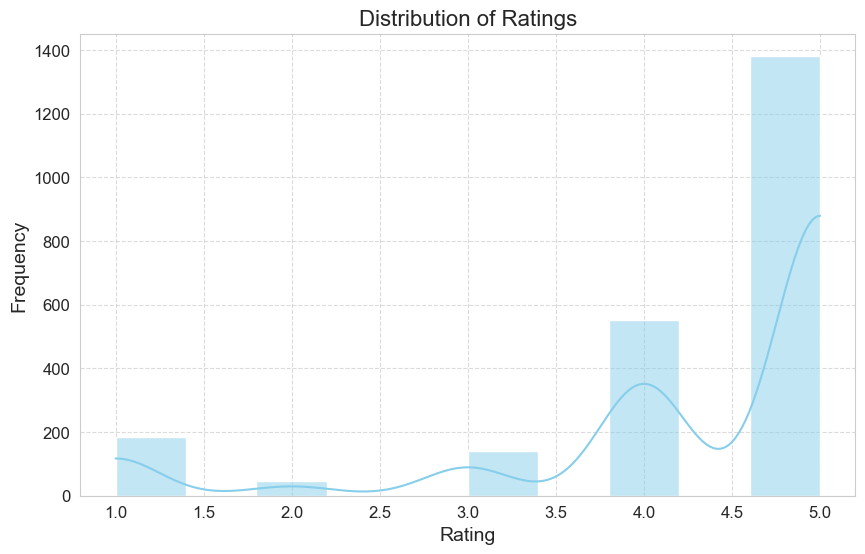

In [6]:
# Histogram of Ratings
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


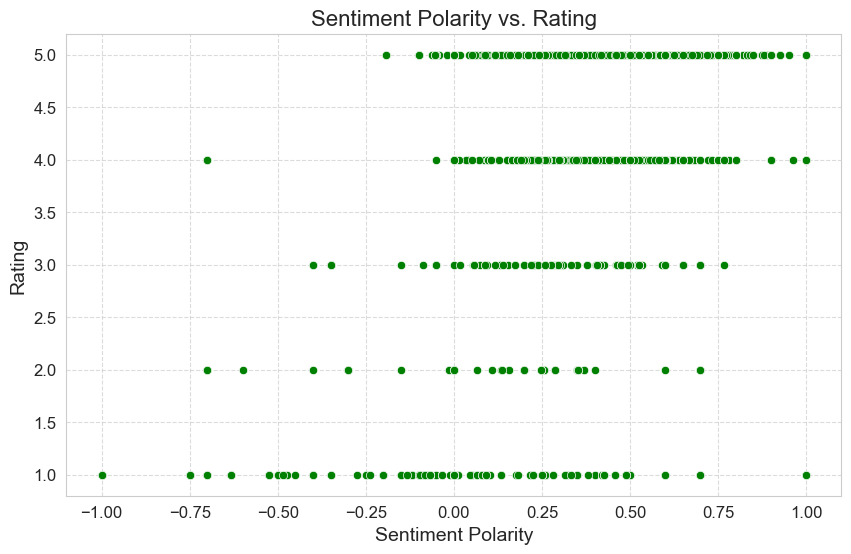

In [7]:
# Scatter Plot of Sentiment Polarity vs. Rating
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Rating', data=dataset, color='green')
plt.title('Sentiment Polarity vs. Rating', fontsize=16)
plt.xlabel('Sentiment Polarity', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


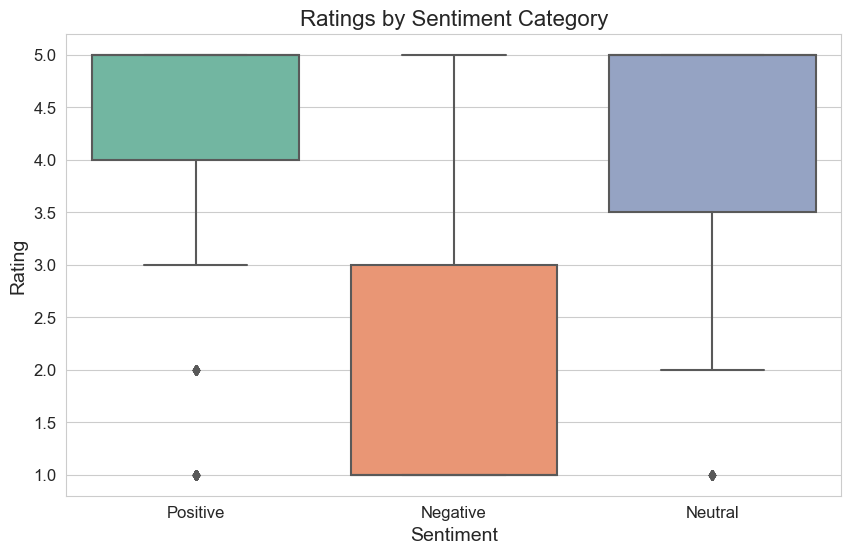

In [8]:
# Box Plot of Ratings by Sentiment Category
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment_Label', y='Rating', data=dataset, palette='Set2')
plt.title('Ratings by Sentiment Category', fontsize=16)
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


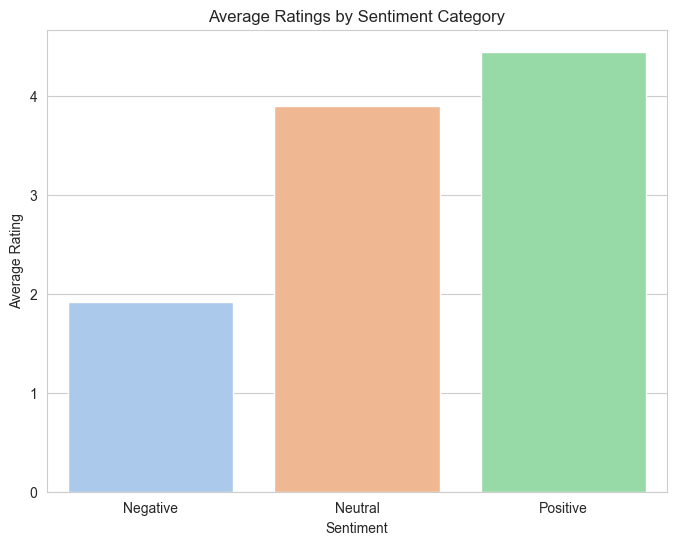

In [9]:
# Bar Plot of Average Ratings by Sentiment Category
average_ratings = dataset.groupby('Sentiment_Label')['Rating'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Sentiment_Label', y='Rating', data=average_ratings, palette='pastel')
plt.title('Average Ratings by Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.show()

C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


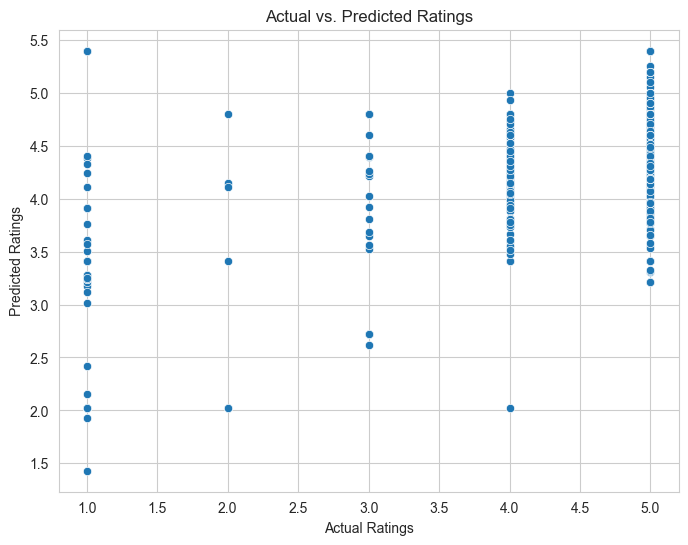

In [20]:
# Visualizing Regression Analysis Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten())
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

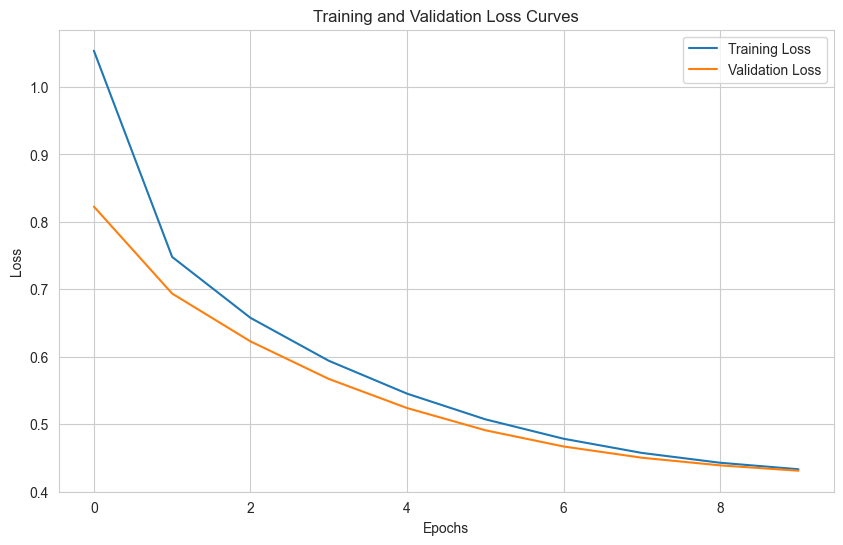

In [21]:
# Visualizing Training Loss Curves for Deep Learning Models
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

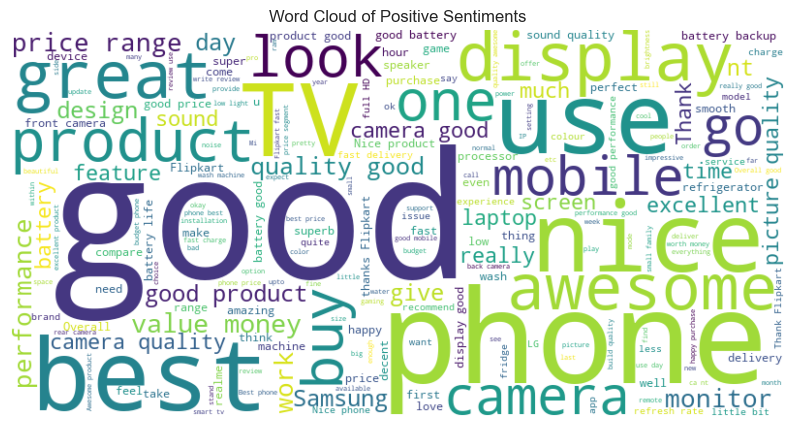

In [10]:
#Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter dataset for positive sentiment reviews
positive_reviews = dataset[dataset['Sentiment_Label'] == 'Positive']

# Concatenate all positive sentiment reviews into a single string
positive_text = ' '.join(positive_reviews['Preprocessed_Review'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', stopwords=None).generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Positive Sentiments')
plt.axis('off')
plt.show()


In [16]:
# Deep Learning Model for detection and segmentation whether the sentiment is positive, Negative or Neutral.
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import string
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.callbacks import EarlyStopping

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Dataset loading
file_path = "C:/Users/Om Chinchore/Desktop/VU SEM-VI/flipkart.csv"
dataset = pd.read_csv(file_path)

# Text preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # POS tagging
    pos_tags = pos_tag(tokens)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for word, tag in pos_tags:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        else:
            pos = 'a'  # Adjective or adverb
        lemmatized_tokens.append(lemmatizer.lemmatize(word, pos))
    
    # Remove punctuation
    table = str.maketrans('', '', string.punctuation)
    no_punctuation_tokens = [token.translate(table) for token in lemmatized_tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in no_punctuation_tokens if word.lower() not in stop_words]
    
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text

# Sentiment analysis implementation
def perform_sentiment_analysis(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        sentiment_label = "Positive"
    elif polarity == 0:
        sentiment_label = "Neutral"
    else:
        sentiment_label = "Negative"
    return sentiment_label, polarity

# Integration of text preprocessing and sentiment analysis results into the dataset
dataset['Preprocessed_Review'] = dataset['Review'].apply(preprocess_text)
dataset['Sentiment_Label'], dataset['Sentiment_Polarity'] = zip(*dataset['Preprocessed_Review'].apply(perform_sentiment_analysis))

# Convert sentiment labels to numerical values
label_encoder = LabelEncoder()
dataset['Sentiment_Label'] = label_encoder.fit_transform(dataset['Sentiment_Label'])

# Prepare data for deep learning model
tokenizer = Tokenizer()
tokenizer.fit_on_texts(dataset['Preprocessed_Review'])
X = tokenizer.texts_to_sequences(dataset['Preprocessed_Review'])
X = pad_sequences(X)
y = dataset['Sentiment_Label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the deep learning model architecture
embedding_dim = 100
max_sequence_length = X.shape[1]

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=3, activation='softmax'))  # 3 classes for positive, neutral, negative

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


[nltk_data] Downloading package punkt to C:\Users\Om
[nltk_data]     Chinchore\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Om
[nltk_data]     Chinchore\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Om
[nltk_data]     Chinchore\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Om Chinchore\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
C:\Users\Om Chinchore\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\Om Chinchore


Epoch 1/10


26/26 [==============================] - 22s 453ms/step - loss: 0.5855 - accuracy: 0.8679 - val_loss: 0.4153 - val_accuracy: 0.8919
Epoch 2/10
26/26 [==============================] - 10s 389ms/step - loss: 0.3980 - accuracy: 0.8938 - val_loss: 0.4069 - val_accuracy: 0.8919
Epoch 3/10
26/26 [==============================] - 10s 383ms/step - loss: 0.3487 - accuracy: 0.8938 - val_loss: 0.3208 - val_accuracy: 0.8919
Epoch 4/10
26/26 [==============================] - 9s 367ms/step - loss: 0.1929 - accuracy: 0.9276 - val_loss: 0.1973 - val_accuracy: 0.9297
Epoch 5/10
26/26 [==============================] - 10s 384ms/step - loss: 0.0931 - accuracy: 0.9686 - val_loss: 0.1661 - val_accuracy: 0.9297
Epoch 6/10
26/26 [==============================] - 10s 377ms/step - loss: 0.0554 - accuracy: 0.9831 - val_loss: 0.1399 - val_accuracy: 0.9514
Epoch 7/10
26/26 [==============================] - 10s 384ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.1316 - val_accuracy: 0.96

In [18]:
# Enhance the previous algorithm to accurately predict the overall sentiment 
# Define a more complex neural network architecture, such as an ensemble of LSTM and CNN models
from keras.models import Model
from keras.layers import Conv1D, GlobalMaxPooling1D, concatenate

# LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(units=3, activation='softmax'))

# CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
cnn_model.add(Conv1D(filters=128, kernel_size=3, padding='valid', activation='relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(units=3, activation='softmax'))

# Combine models
combined_model = concatenate([lstm_model.output, cnn_model.output])
combined_model = Dense(10, activation='relu')(combined_model)
combined_model_output = Dense(3, activation='softmax')(combined_model)

# Create a model that includes the inputs and outputs of the combined model
ensemble_model = Model(inputs=[lstm_model.input, cnn_model.input], outputs=combined_model_output)

# Compile the ensemble model
ensemble_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ensemble model
history = ensemble_model.fit([X_train, X_train], y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the ensemble model
loss, accuracy = ensemble_model.evaluate([X_test, X_test], y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
26/26 [==============================] - 25s 482ms/step - loss: 1.0538 - accuracy: 0.5223 - val_loss: 0.8227 - val_accuracy: 0.8919
Epoch 2/10
26/26 [==============================] - 11s 425ms/step - loss: 0.7480 - accuracy: 0.8938 - val_loss: 0.6937 - val_accuracy: 0.8919
Epoch 3/10
26/26 [==============================] - 11s 428ms/step - loss: 0.6577 - accuracy: 0.8938 - val_loss: 0.6228 - val_accuracy: 0.8919
Epoch 4/10
26/26 [==============================] - 11s 421ms/step - loss: 0.5940 - accuracy: 0.8938 - val_loss: 0.5671 - val_accuracy: 0.8919
Epoch 5/10
26/26 [==============================] - 11s 415ms/step - loss: 0.5453 - accuracy: 0.8938 - val_loss: 0.5239 - val_accuracy: 0.8919
Epoch 6/10
26/26 [==============================] - 11s 410ms/step - loss: 0.5072 - accuracy: 0.8938 - val_loss: 0.4910 - val_accuracy: 0.8919
Epoch 7/10
26/26 [==============================] - 11s 415ms/step - loss: 0.4784 - accuracy: 0.8938 - val_loss: 0.4669 - val_accuracy: 0.8919